# Modelos

Luego de tener nuestros datos limpios exportados, procedemos a realizar estandarización y modelos para resolver el problema. 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Lectura de datos

Descargamos una muestra del dataset en la carpeta data. Vamos a empezar a explorarlo

In [4]:
df = pd.read_csv('data/data_clean.csv')
df.head()

,n_personas_hogar,lugar_vivienda,edad,cotiza_prestaciones,nivel_educativo,ocupacion,recibio_alimentos_pago_trabajo,recibio_vivienda_pago_trabajo,recibio_transporte_empresa,recibio_pago_especie,...,recibio_dinero_personas_residentes,recibio_dinero_personas_extranjeras,recibio_ayuda_institucional,recibio_pago_bancos,recibio_cesantias,tiene_edad_trabajar,ingreso_dividendos,ingreso_ayudas_hogares,ingreso_arriendos,ingreso_total_observado
0,1,urbano,33,False,Media,Trabajando,False,False,False,False,...,False,False,False,False,False,True,0.0,0.0,0.0,768000.0
1,1,urbano,31,False,Media,Oficios del hogar,False,False,False,False,...,False,False,False,False,False,True,0.0,0.0,0.0,0.0
2,1,urbano,76,False,Ninguno,Oficios del hogar,False,False,False,False,...,False,False,False,False,False,True,0.0,0.0,0.0,0.0
3,1,urbano,58,True,Básica primaria,Trabajando,False,False,False,False,...,False,False,True,False,False,True,0.0,0.0,0.0,792500.0
4,1,urbano,61,True,Básica primaria,Oficios del hogar,False,False,False,False,...,False,False,False,False,False,True,0.0,0.0,0.0,50000.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186550 entries, 0 to 186549
Data columns (total 25 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   n_personas_hogar                     186550 non-null  int64  
 1   lugar_vivienda                       186550 non-null  object 
 2   edad                                 186550 non-null  int64  
 3   cotiza_prestaciones                  186550 non-null  bool   
 4   nivel_educativo                      186550 non-null  object 
 5   ocupacion                            186550 non-null  object 
 6   recibio_alimentos_pago_trabajo       186550 non-null  bool   
 7   recibio_vivienda_pago_trabajo        186550 non-null  bool   
 8   recibio_transporte_empresa           186550 non-null  bool   
 9   recibio_pago_especie                 186550 non-null  bool   
 10  recibio_bonificaciones_anuales       186550 non-null  bool   
 11  horas_semana_

In [6]:
df['lugar_vivienda'].unique()

array(['urbano', 'rural'], dtype=object)

In [7]:
df['is_urbano'] = df['lugar_vivienda'].map({'urbano': True, 'rural': False})

df.drop('lugar_vivienda', axis=1, inplace=True)

df.head()

,n_personas_hogar,edad,cotiza_prestaciones,nivel_educativo,ocupacion,recibio_alimentos_pago_trabajo,recibio_vivienda_pago_trabajo,recibio_transporte_empresa,recibio_pago_especie,recibio_bonificaciones_anuales,...,recibio_dinero_personas_extranjeras,recibio_ayuda_institucional,recibio_pago_bancos,recibio_cesantias,tiene_edad_trabajar,ingreso_dividendos,ingreso_ayudas_hogares,ingreso_arriendos,ingreso_total_observado,is_urbano
0,1,33,False,Media,Trabajando,False,False,False,False,False,...,False,False,False,False,True,0.0,0.0,0.0,768000.0,True
1,1,31,False,Media,Oficios del hogar,False,False,False,False,False,...,False,False,False,False,True,0.0,0.0,0.0,0.0,True
2,1,76,False,Ninguno,Oficios del hogar,False,False,False,False,False,...,False,False,False,False,True,0.0,0.0,0.0,0.0,True
3,1,58,True,Básica primaria,Trabajando,False,False,False,False,False,...,False,True,False,False,True,0.0,0.0,0.0,792500.0,True
4,1,61,True,Básica primaria,Oficios del hogar,False,False,False,False,False,...,False,False,False,False,True,0.0,0.0,0.0,50000.0,True


1= 'urbano', 0='rural'

In [8]:
print(df['nivel_educativo'].unique())
print(df['ocupacion'].unique())

['Media' 'Ninguno' 'Básica primaria' 'Básica secundaria'
 'No sabe, no informa' 'Superior o universitaria' 'Preescolar']
['Trabajando' 'Oficios del hogar' 'Incapacitado permanente'
 'Otra actividad' 'Buscando trabajo' 'Estudiando']


In [9]:
df['nivel_educativo'] = df['nivel_educativo'].replace('No sabe, no informa', 'Ninguno')

In [10]:
nivel_educativo_order = ['Ninguno', 'Preescolar', 'Básica primaria', 'Básica secundaria', 'Media', 'Superior o universitaria']

# Aplicar un CategoricalDtype para darle el orden a la columna
df['nivel_educativo'] = pd.Categorical(df['nivel_educativo'], categories=nivel_educativo_order, ordered=True)

# Convertir las categorías a números
df['nivel_educativo'] = df['nivel_educativo'].cat.codes

df.head()

,n_personas_hogar,edad,cotiza_prestaciones,nivel_educativo,ocupacion,recibio_alimentos_pago_trabajo,recibio_vivienda_pago_trabajo,recibio_transporte_empresa,recibio_pago_especie,recibio_bonificaciones_anuales,...,recibio_dinero_personas_extranjeras,recibio_ayuda_institucional,recibio_pago_bancos,recibio_cesantias,tiene_edad_trabajar,ingreso_dividendos,ingreso_ayudas_hogares,ingreso_arriendos,ingreso_total_observado,is_urbano
0,1,33,False,4,Trabajando,False,False,False,False,False,...,False,False,False,False,True,0.0,0.0,0.0,768000.0,True
1,1,31,False,4,Oficios del hogar,False,False,False,False,False,...,False,False,False,False,True,0.0,0.0,0.0,0.0,True
2,1,76,False,0,Oficios del hogar,False,False,False,False,False,...,False,False,False,False,True,0.0,0.0,0.0,0.0,True
3,1,58,True,2,Trabajando,False,False,False,False,False,...,False,True,False,False,True,0.0,0.0,0.0,792500.0,True
4,1,61,True,2,Oficios del hogar,False,False,False,False,False,...,False,False,False,False,True,0.0,0.0,0.0,50000.0,True


In [11]:
df = pd.get_dummies(df, columns=['ocupacion'], drop_first=True)

df.head()

,n_personas_hogar,edad,cotiza_prestaciones,nivel_educativo,recibio_alimentos_pago_trabajo,recibio_vivienda_pago_trabajo,recibio_transporte_empresa,recibio_pago_especie,recibio_bonificaciones_anuales,horas_semana_trabajo,...,ingreso_dividendos,ingreso_ayudas_hogares,ingreso_arriendos,ingreso_total_observado,is_urbano,ocupacion_Estudiando,ocupacion_Incapacitado permanente,ocupacion_Oficios del hogar,ocupacion_Otra actividad,ocupacion_Trabajando
0,1,33,False,4,False,False,False,False,False,72.000000,...,0.0,0.0,0.0,768000.0,True,0,0,0,0,1
1,1,31,False,4,False,False,False,False,False,44.925939,...,0.0,0.0,0.0,0.0,True,0,0,1,0,0
2,1,76,False,0,False,False,False,False,False,44.925939,...,0.0,0.0,0.0,0.0,True,0,0,1,0,0
3,1,58,True,2,False,False,False,False,False,40.000000,...,0.0,0.0,0.0,792500.0,True,0,0,0,0,1
4,1,61,True,2,False,False,False,False,False,14.000000,...,0.0,0.0,0.0,50000.0,True,0,0,1,0,0


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = ['n_personas_hogar', 'edad', 'horas_semana_trabajo', 
                'ingreso_dividendos', 'ingreso_ayudas_hogares', 'nivel_educativo']

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [13]:
df.head()

,n_personas_hogar,edad,cotiza_prestaciones,nivel_educativo,recibio_alimentos_pago_trabajo,recibio_vivienda_pago_trabajo,recibio_transporte_empresa,recibio_pago_especie,recibio_bonificaciones_anuales,horas_semana_trabajo,...,ingreso_dividendos,ingreso_ayudas_hogares,ingreso_arriendos,ingreso_total_observado,is_urbano,ocupacion_Estudiando,ocupacion_Incapacitado permanente,ocupacion_Oficios del hogar,ocupacion_Otra actividad,ocupacion_Trabajando
0,-0.094055,-0.485648,False,0.668407,False,False,False,False,False,2.709272,...,-0.009193,-0.151868,0.0,768000.0,True,0,0,0,0,1
1,-0.094055,-0.594655,False,0.668407,False,False,False,False,False,0.000000,...,-0.009193,-0.151868,0.0,0.0,True,0,0,1,0,0
2,-0.094055,1.857985,False,-2.632181,False,False,False,False,False,0.000000,...,-0.009193,-0.151868,0.0,0.0,True,0,0,1,0,0
3,-0.094055,0.876929,True,-0.981887,False,False,False,False,False,-0.492933,...,-0.009193,-0.151868,0.0,792500.0,True,0,0,0,0,1
4,-0.094055,1.040438,True,-0.981887,False,False,False,False,False,-3.094725,...,-0.009193,-0.151868,0.0,50000.0,True,0,0,1,0,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186550 entries, 0 to 186549
Data columns (total 29 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   n_personas_hogar                     186550 non-null  float64
 1   edad                                 186550 non-null  float64
 2   cotiza_prestaciones                  186550 non-null  bool   
 3   nivel_educativo                      186550 non-null  float64
 4   recibio_alimentos_pago_trabajo       186550 non-null  bool   
 5   recibio_vivienda_pago_trabajo        186550 non-null  bool   
 6   recibio_transporte_empresa           186550 non-null  bool   
 7   recibio_pago_especie                 186550 non-null  bool   
 8   recibio_bonificaciones_anuales       186550 non-null  bool   
 9   horas_semana_trabajo                 186550 non-null  float64
 10  recibio_pagos_arriendos              186550 non-null  bool   
 11  recibio_pagos

## KNN sin PCA

Se inicia con n_clusters igual a 4 porque son los identificados por el DANE:
    
- Pobreza
- Vulnerable
- Clase media
- Clase alta

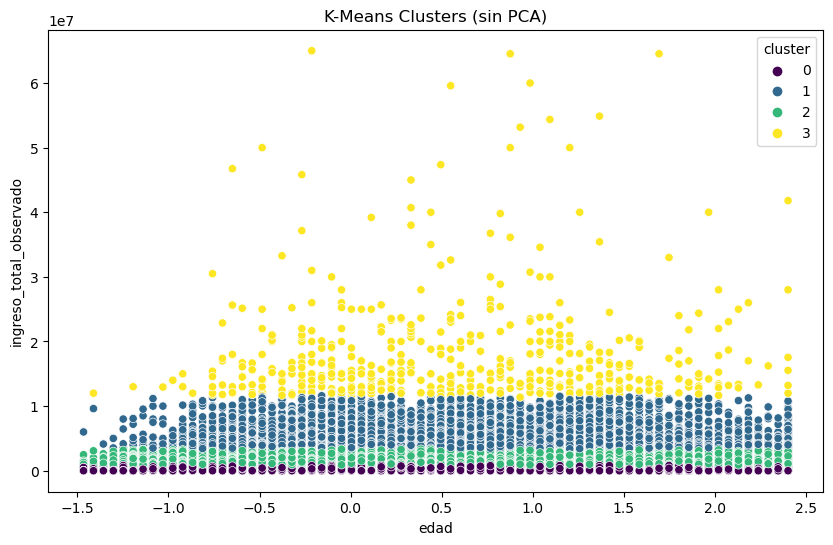

In [15]:
from sklearn.cluster import KMeans

# Definir el número de clusters
num_clusters = 4

# Aplicar K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=10101, n_init=10)
kmeans.fit_predict(df)

df['cluster'] = kmeans.labels_

# Visualizar los clusters formados
plt.figure(figsize=(10, 6))
sns.scatterplot(x='edad', y='ingreso_total_observado', hue='cluster', data=df, palette='viridis')
plt.title('K-Means Clusters (sin PCA)')
plt.show()

## PCA

In [16]:
from sklearn.decomposition import PCA

df_standardized =df.copy()

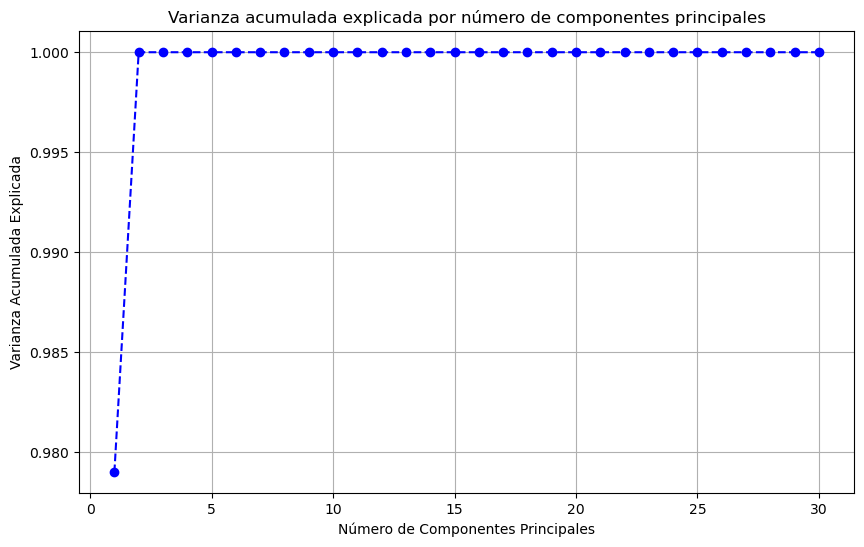

In [17]:
# Calculo PCA y grafica de varianza acumulada  explicada
pca = PCA(random_state=123)
X_pca = pca.fit_transform(df_standardized)

explained_variance = pca.explained_variance_ratio_
explained_variance_cumsum = np.cumsum(explained_variance)

# Crear el gráfico de sedimentación
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance_cumsum, marker='o', linestyle='--', color='b')
plt.title('Varianza acumulada explicada por número de componentes principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada Explicada')
plt.grid(True)
plt.show()

In [18]:
pca = PCA(n_components=0.98, random_state=123)
X_pca = pca.fit_transform(df_standardized)
print("Cantidad de componentes que explican el 99% de la varianza:  " + str(X_pca.shape[1]))

Cantidad de componentes que explican el 99% de la varianza:  2


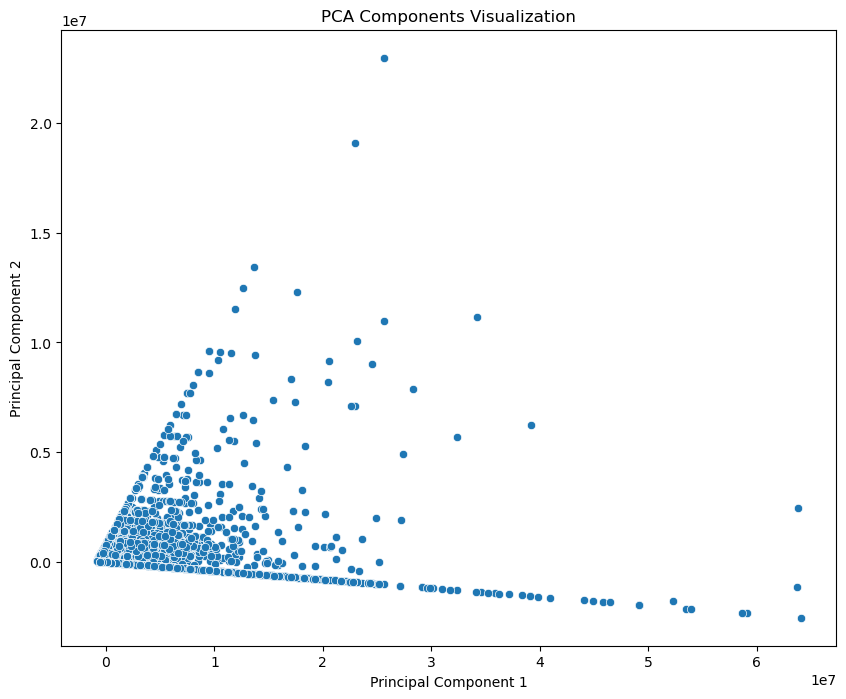

In [19]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1])
plt.title('PCA Components Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [20]:
X_pca

array([[-9.21299635e+04, -1.89196094e+04],
       [-8.59530711e+05,  1.14134329e+04],
       [-8.59530711e+05,  1.14134329e+04],
       ...,
       [ 1.83336644e+06, -9.50286883e+04],
       [-5.59764794e+05, -4.35411742e+02],
       [-5.68091625e+05, -1.06277168e+02]])

In [21]:
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

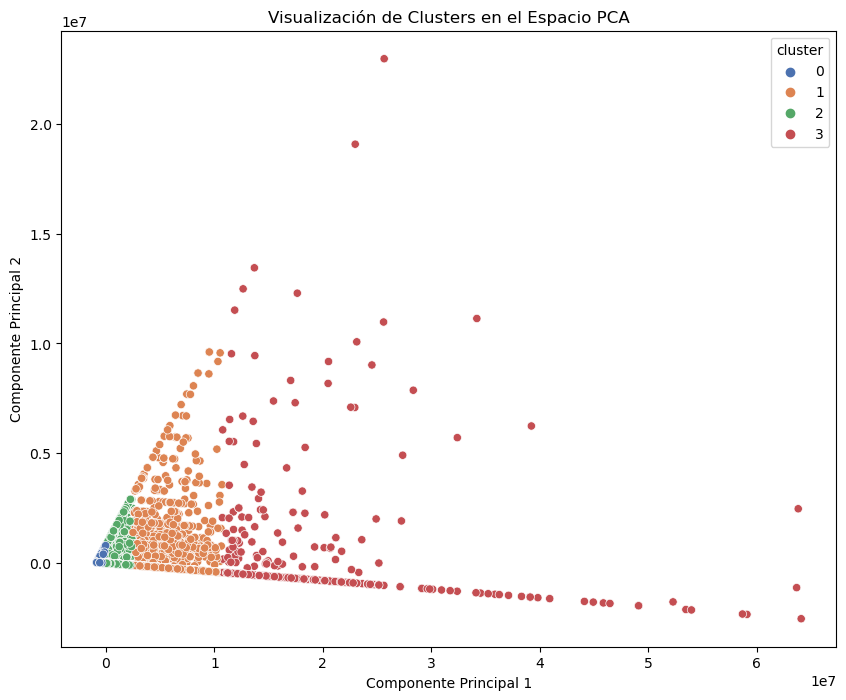

In [22]:
num_clusters = 4

# Aplicar K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=10101, n_init=10)
kmeans.fit_predict(df_pca)

df_pca['cluster'] = kmeans.labels_

# Visualizar los clusters formados
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_pca, palette='deep')
plt.title('Visualización de Clusters en el Espacio PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

In [23]:
# Agrupar por cluster y calcular estadísticas descriptivas
cluster_characteristics = df_pca.groupby('cluster')[['PC1', 'PC2']].agg(['mean', 'median', 'std', 'count'])
cluster_characteristics

PC1                                                PC2  \
                 mean        median           std   count           mean   
cluster                                                                    
0       -6.864382e+05 -8.595307e+05  2.466085e+05  117477    8877.544470   
1        4.362626e+06  3.793805e+06  1.756281e+06    7812   -3284.039085   
2        6.211378e+05  3.924073e+05  5.829008e+05   60746  -18215.042673   
3        1.714219e+07  1.412877e+07  8.552682e+06     515  173278.842391   

                                              
                median           std   count  
cluster                                       
0         11413.432924  4.468719e+04  117477  
1       -159736.545588  7.402238e+05    7812  
2        -37055.135099  1.843488e+05   60746  
3       -532561.430416  2.581741e+06     515

### Explicando PCA

In [24]:
cargas = pd.DataFrame(pca.components_, columns=df.columns, index=['Componente 1', 'Componente 2'])
print(cargas)

              n_personas_hogar          edad  cotiza_prestaciones  \
Componente 1     -1.048153e-08  8.367317e-08         9.831742e-09   
Componente 2     -1.222562e-08  2.570259e-07        -4.375499e-10   

              nivel_educativo  recibio_alimentos_pago_trabajo  \
Componente 1     8.206738e-08                    2.389718e-09   
Componente 2    -9.213720e-08                   -1.092380e-08   

              recibio_vivienda_pago_trabajo  recibio_transporte_empresa  \
Componente 1                   1.768808e-09                3.520706e-09   
Componente 2                  -6.047332e-09               -6.594733e-09   

              recibio_pago_especie  recibio_bonificaciones_anuales  \
Componente 1          7.862889e-10                    3.478152e-10   
Componente 2         -1.291860e-09                    3.256184e-10   

              horas_semana_trabajo  ...  ingreso_ayudas_hogares  \
Componente 1          5.876429e-08  ...            4.352581e-08   
Componente 2         -1.3

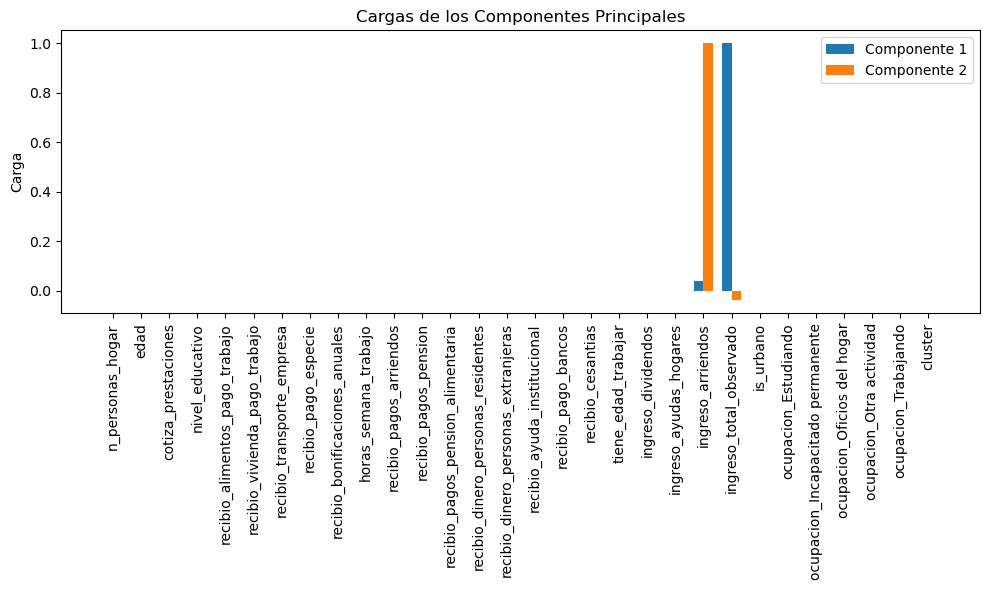

In [25]:
# Definir la figura
fig, ax = plt.subplots(figsize=(10, 6))

# Variables originales (columnas)
variables = df.columns

# Dibujar las cargas de los dos componentes
x = np.arange(len(variables))
width = 0.35  # El ancho de las barras

# Barras para el Componente 1
ax.bar(x - width/2, cargas.loc['Componente 1'], width, label='Componente 1')

# Barras para el Componente 2
ax.bar(x + width/2, cargas.loc['Componente 2'], width, label='Componente 2')

# Etiquetas y título
ax.set_ylabel('Carga')
ax.set_title('Cargas de los Componentes Principales')
ax.set_xticks(x)
ax.set_xticklabels(variables, rotation=90)
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

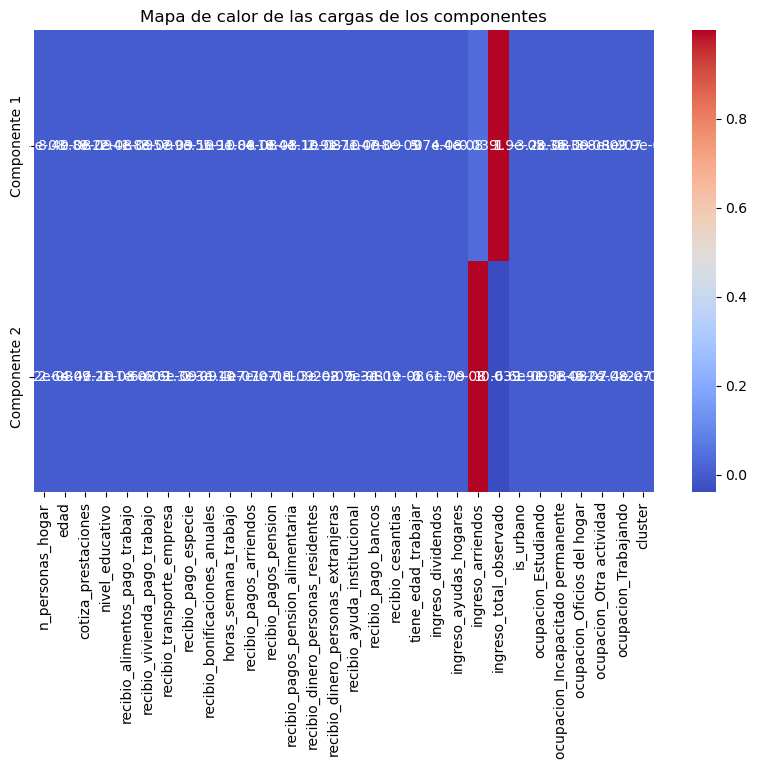

In [26]:
pca_components = pd.DataFrame(pca.components_, columns=df.columns, index=[f'Componente {i+1}' for i in range(pca.n_components_)])

plt.figure(figsize=(10,6))
sns.heatmap(pca_components, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de las cargas de los componentes')
plt.show()

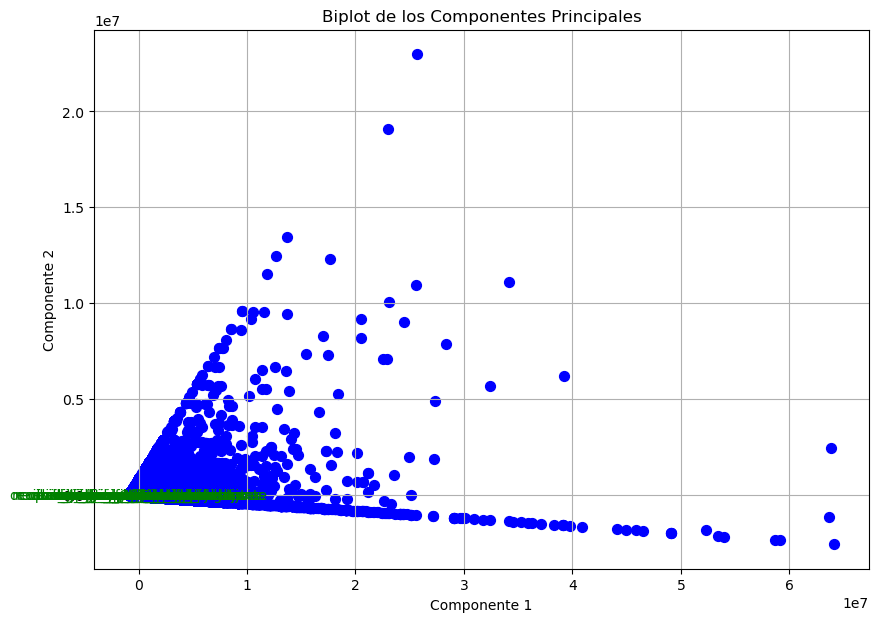

In [27]:
plt.figure(figsize=(10,7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='b', s=50)

# Añadir vectores de los componentes
for i, var in enumerate(df.columns):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='r', alpha=0.5)
    plt.text(pca.components_[0, i] * 1.15, pca.components_[1, i] * 1.15, var, color='g', ha='center', va='center')

plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('Biplot de los Componentes Principales')
plt.grid()
plt.show()


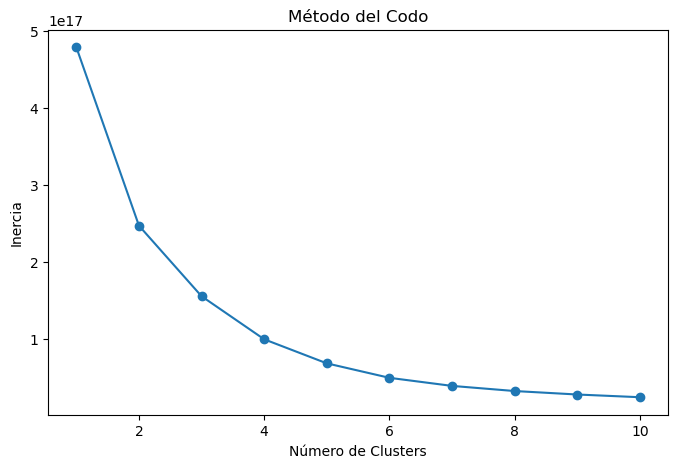

In [28]:
inertia = []
num_clusters_range = range(1, 11)  # Probar con 1 a 10 clusters

for k in num_clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=10101, n_init=10)
    kmeans.fit(df_pca[['PC1', 'PC2']])
    inertia.append(kmeans.inertia_)

# Graficar el resultado
plt.figure(figsize=(8, 5))
plt.plot(num_clusters_range, inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.show()

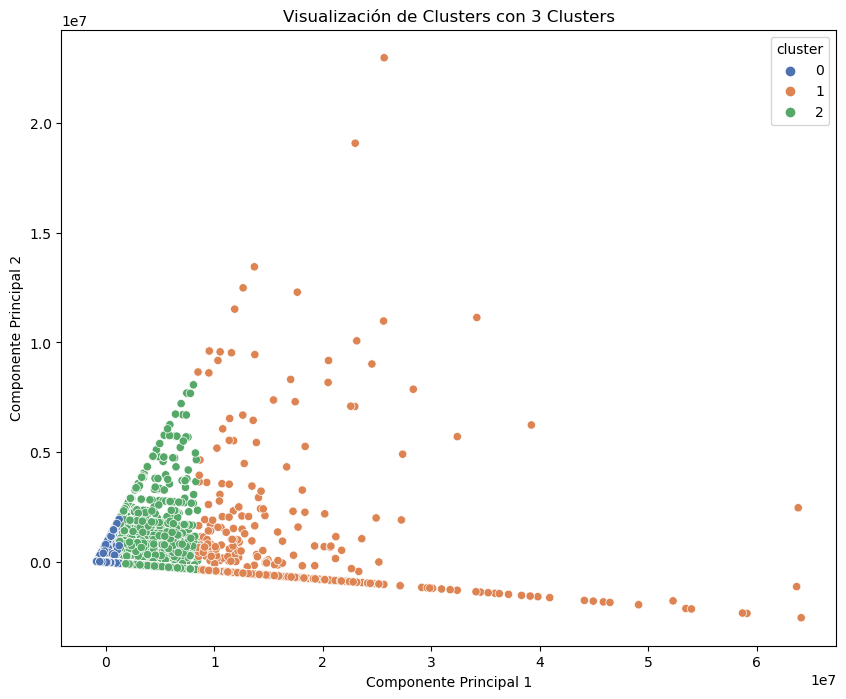

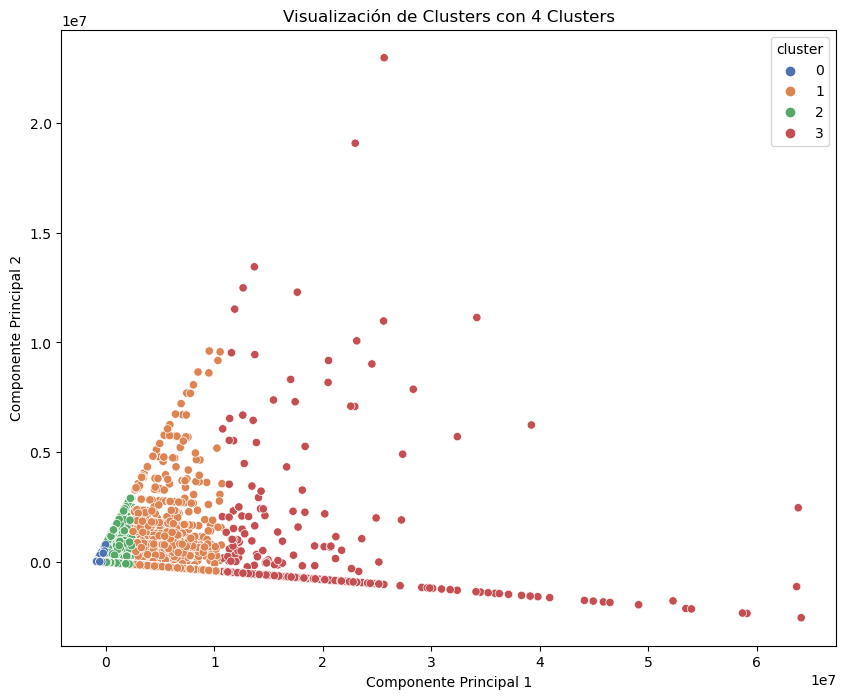

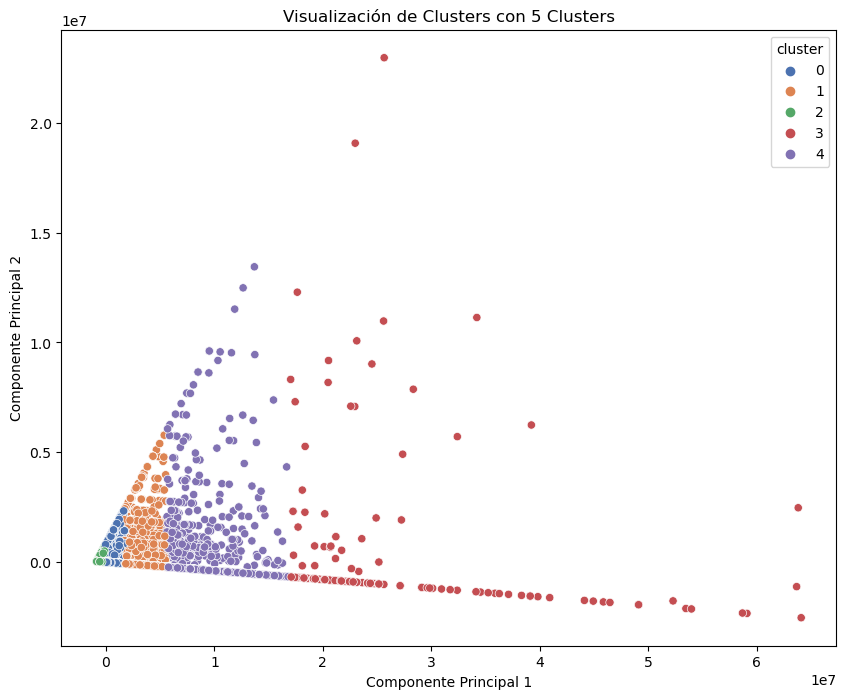

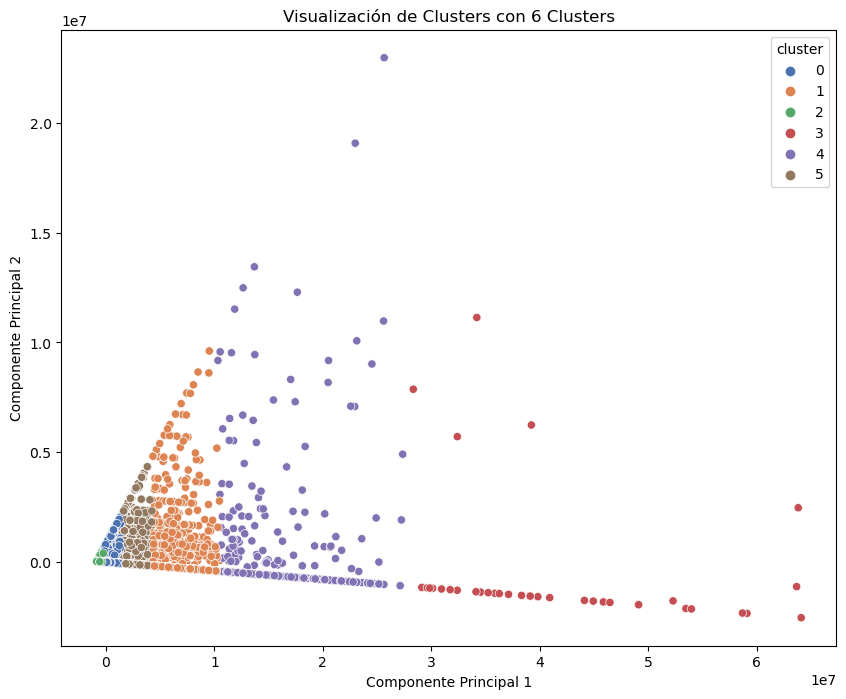

In [29]:
def plot_clusters(n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=10101, n_init=10)
    df_pca['cluster'] = kmeans.fit_predict(df_pca[['PC1', 'PC2']])

    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_pca, palette='deep')
    plt.title(f'Visualización de Clusters con {n_clusters} Clusters')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.show()

# Probar con diferentes números de clusters
for n in [3, 4, 5, 6]:
    plot_clusters(n)

## DBSCAN

In [30]:
from sklearn.cluster import DBSCAN

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Ajusta 'eps' y 'min_samples' según sea necesario
df_pca['dbscan_cluster'] = dbscan.fit_predict(df_pca)

# Ver cuántos clusters se han formado
num_clusters = len(set(df_pca['dbscan_cluster'])) - (1 if -1 in df_pca['dbscan_cluster'].values else 0)
print(f"Número de clusters formados: {num_clusters}")

Número de clusters formados: 2094


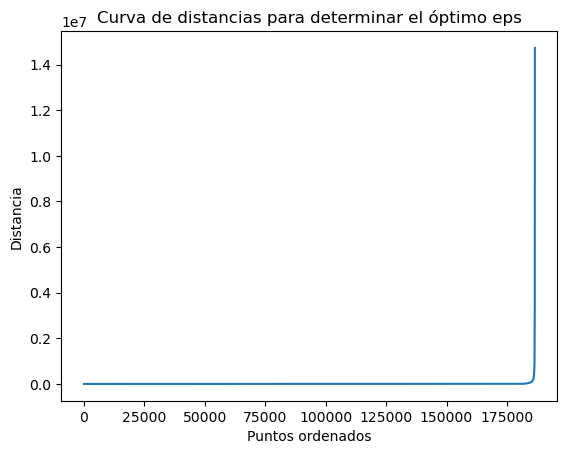

In [31]:
from sklearn.neighbors import NearestNeighbors

# Determinar el número de dimensiones (D) del DataFrame
D = df_pca.shape[1]

# Calcular min_samples usando la regla 2 * D
min_samples = 2 * D

# Encontrar el valor óptimo de eps usando la distancia al k-ésimo vecino
# Para eps, usamos el valor de 'min_samples' para definir 'k'
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(df_pca)
distances, indices = neighbors_fit.kneighbors(df_pca)

# Ordenar las distancias para encontrar el punto óptimo (codo en la curva de distancias)
distances = np.sort(distances[:, min_samples - 1], axis=0)

# Graficar la curva de distancias para visualizar el "codo"
plt.plot(distances)
plt.ylabel('Distancia')
plt.xlabel('Puntos ordenados')
plt.title('Curva de distancias para determinar el óptimo eps')
plt.show()

In [32]:
#pip install kneed

In [33]:
from kneed import KneeLocator

knee = KneeLocator(range(len(distances)), distances, curve='convex', direction='increasing')
optimal_eps = distances[knee.knee]

print(f"Valor óptimo de eps: {optimal_eps}")
print(f"Valor de min_samples: {min_samples}")

Valor óptimo de eps: 4365231.9999998715
Valor de min_samples: 8


In [38]:
# Tomar una muestra aleatoria del 30% de los datos
df_sample = df_pca.sample(frac=0.3, random_state=42)

# Aplicar DBSCAN a la muestra
dbscan = DBSCAN(eps=optimal_eps, min_samples=min_samples)
df_sample['dbscan_cluster'] = dbscan.fit_predict(df_sample)

In [39]:
# Ver cuántos clusters se han formado (excluyendo ruido, etiquetado como -1)
num_clusters = len(set(df_pca['dbscan_cluster'].unique())) - (1 if -1 in df_pca['dbscan_cluster'].unique() else 0)
print(f"Número de clusters formados: {num_clusters}")

Número de clusters formados: 2094


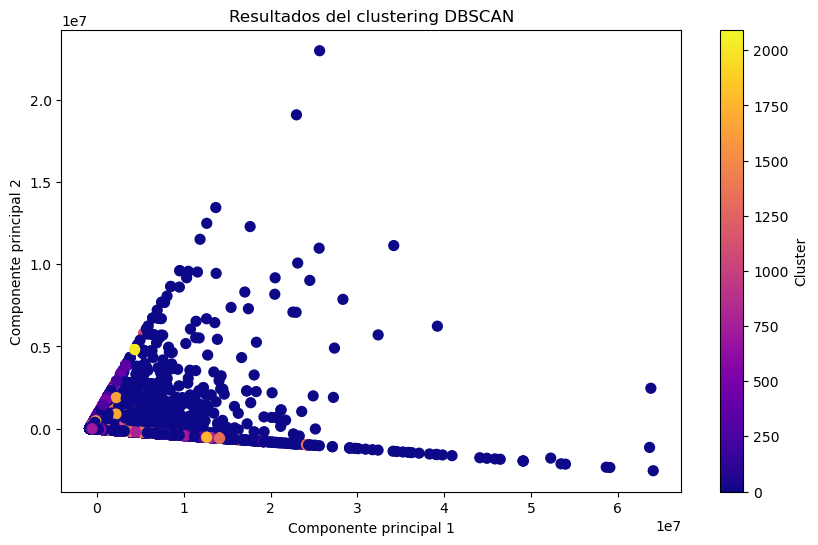

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Graficar los puntos y colorear según el cluster asignado por DBSCAN
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['dbscan_cluster'], cmap='plasma', s=50)

# Título y etiquetas
plt.title('Resultados del clustering DBSCAN')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')

# Mostrar la gráfica
plt.colorbar(label='Cluster')
plt.show()

En primer lugar se utilizó DBSCAN ajustando los parámetros eps y min_samples de forma inicial, y se aplicó el clustering a los datos reducidos dimensionalmente en PCA. A continuación, se intentó optimizar el valor de eps graficando la distancia al k-ésimo vecino más cercano, lo que reveló un aumento significativo (codo en la curva) en los puntos finales, indicando el valor adecuado de eps. Para esto se usó la técnica del "KneeLocator" para determinar el valor óptimo de eps, resultando en 4365231.99.

Posteriormente, se aplicó DBSCAN con los valores óptimos a una muestra del 30% de los datos por problemas de capacidad de memoria. El valor de min_samples se calculó usando la regla 2 * D, donde D es el número de dimensiones del DataFrame. Al aplicar el clustering, se formaron 2094 clusters, lo que muestra una alta granularidad en los datos al usar este valor optimizado de eps.